In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [35]:
paris_l = pd.read_csv("/Users/LPA/Desktop/PROJET DATABIRD/BASE DE DONNÉE PARIS/paris_listings.csv")
paris_l.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5396,https://www.airbnb.com/rooms/5396,20230313171257,2023-03-14,city scrape,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.83,4.95,4.54,7510402838018,f,1,1,0,0,1.99
1,7397,https://www.airbnb.com/rooms/7397,20230313171257,2023-03-29,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.88,4.93,4.73,7510400829623,f,2,2,0,0,2.26


In [36]:
paris_l_clean = paris_l[['id', 'neighbourhood_cleansed', 'latitude', 'longitude',	'price','room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms_text', 'amenities']]
paris_l_clean.head(20)


,id,neighbourhood_cleansed,latitude,longitude,price,room_type,accommodates,bedrooms,beds,bathrooms_text,amenities
0,5396,Hôtel-de-Ville,48.85247,2.35835,$124.00,Entire home/apt,2,NaN,1.0,1 bath,"[""Bed linens"", ""Heating"", ""Shower gel"", ""Host ..."
1,7397,Hôtel-de-Ville,48.85909,2.35315,$130.00,Entire home/apt,4,2.0,2.0,1 bath,"[""Bed linens"", ""Hangers"", ""Cooking basics"", ""C..."
2,7964,Opéra,48.87417,2.34245,$140.00,Entire home/apt,2,1.0,1.0,1 bath,"[""Bed linens"", ""Changing table"", ""Heating"", ""P..."
3,9359,Louvre,48.86006,2.34863,$75.00,Entire home/apt,1,1.0,1.0,1 bath,"[""Heating"", ""Dedicated workspace"", ""Elevator"",..."
4,9952,Popincourt,48.86373,2.37093,$160.00,Entire home/apt,2,1.0,1.0,1 bath,"[""First aid kit"", ""Bed linens"", ""Heating"", ""Sh..."
5,10586,Buttes-Montmartre,48.88700,2.34531,$80.00,Entire home/apt,2,NaN,2.0,1 bath,"[""TV with standard cable"", ""Heating"", ""Elevato..."
6,10588,Buttes-Montmartre,48.88725,2.34518,$75.00,Entire home/apt,2,NaN,1.0,1 bath,"[""Heating"", ""Washer"", ""TV with standard cable""..."
7,11265,Buttes-Montmartre,48.88494,2.33997,$100.00,Entire home/apt,2,1.0,1.0,1 bath,"[""Bed linens"", ""Heating"", ""Refrigerator"", ""Fir..."
8,11487,Popincourt,48.86441,2.37139,$60.00,Entire home/apt,1,NaN,1.0,1 bath,"[""Bed linens"", ""Heating"", ""21\"" HDTV with stan..."
9,81870,Luxembourg,48.85558,2.33119,$145.00,Entire home/apt,2,1.0,1.0,1 bath,"[""Heating"", ""Host greets you"", ""Refrigerator"",..."


In [37]:
paris_l_clean['price'] = paris_l_clean['price'].str.replace(',', '')
paris_l_clean['price'] = paris_l_clean['price'].str.replace('$', '')
paris_l_clean['price']
## retirer les dollars du prix

/var/folders/vy/9vppt5zx3k3_0z_sbxs9zb6w0000gp/T/ipykernel_7358/1098670715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_l_clean['price'] = paris_l_clean['price'].str.replace(',', '')
/var/folders/vy/9vppt5zx3k3_0z_sbxs9zb6w0000gp/T/ipykernel_7358/1098670715.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  paris_l_clean['price'] = paris_l_clean['price'].str.replace('$', '')
/var/folders/vy/9vppt5zx3k3_0z_sbxs9zb6w0000gp/T/ipykernel_7358/1098670715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

0        124.00
1        130.00
2        140.00
3         75.00
4        160.00
          ...  
56721    640.00
56722    538.00
56723    600.00
56724    181.00
56725    300.00
Name: price, Length: 56726, dtype: object

In [38]:
paris_l_clean['price'] = paris_l_clean['price'].astype(float)
## convertion du type du price de object en float64

/var/folders/vy/9vppt5zx3k3_0z_sbxs9zb6w0000gp/T/ipykernel_7358/3056532754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_l_clean['price'] = paris_l_clean['price'].astype(float)


In [6]:
paris_l_clean['price'].describe()

count    56726.000000
mean       171.991080
std        598.279546
min          0.000000
25%         73.000000
50%        110.000000
75%        180.000000
max      93000.000000
Name: price, dtype: float64

In [7]:
paris_l_clean = paris_l_clean[paris_l_clean['price'] < 8000]

In [8]:
paris_l_clean.to_csv("/Users/LPA/Desktop/PROJET DATABIRD/BASE DE DONNÉE PARIS/test.csv", sep=";")
paris_l_clean.shape

(56696, 11)

/Users/LPA/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


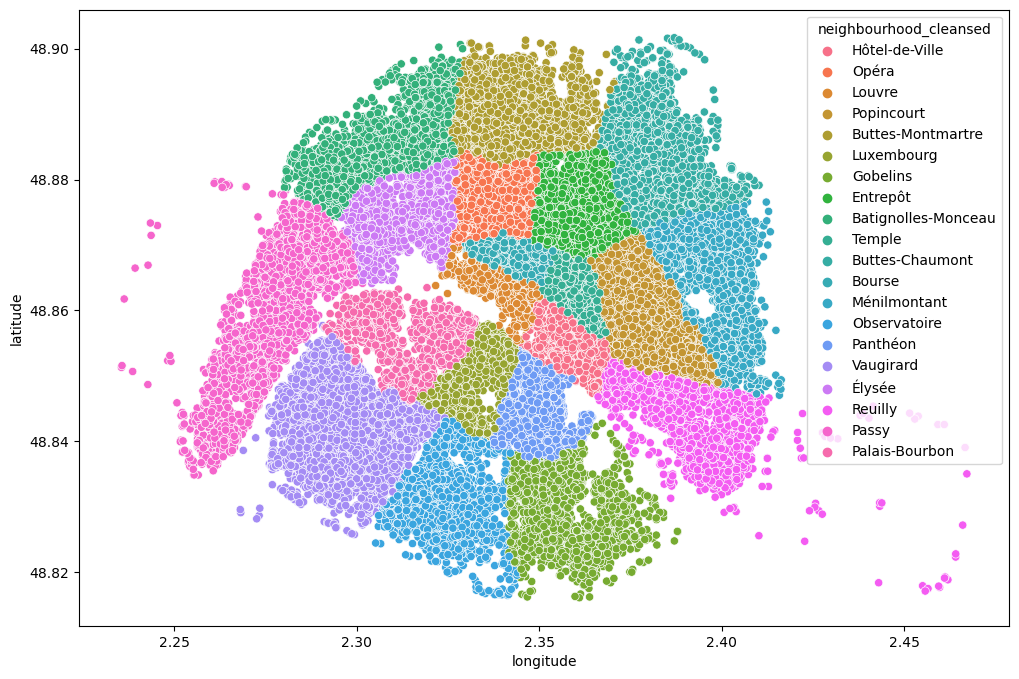

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(paris_l_clean.longitude,paris_l_clean.latitude,hue=paris_l_clean.neighbourhood_cleansed)
plt.ioff()
## Carte des annonces dans les quartier de Paris

In [10]:
ranking = paris_l_clean
ranking.head(20)

,id,neighbourhood_cleansed,latitude,longitude,price,room_type,accommodates,bedrooms,beds,bathrooms_text,amenities
0,5396,Hôtel-de-Ville,48.85247,2.35835,124.0,Entire home/apt,2,NaN,1.0,1 bath,"[""Bed linens"", ""Heating"", ""Shower gel"", ""Host ..."
1,7397,Hôtel-de-Ville,48.85909,2.35315,130.0,Entire home/apt,4,2.0,2.0,1 bath,"[""Bed linens"", ""Hangers"", ""Cooking basics"", ""C..."
2,7964,Opéra,48.87417,2.34245,140.0,Entire home/apt,2,1.0,1.0,1 bath,"[""Bed linens"", ""Changing table"", ""Heating"", ""P..."
3,9359,Louvre,48.86006,2.34863,75.0,Entire home/apt,1,1.0,1.0,1 bath,"[""Heating"", ""Dedicated workspace"", ""Elevator"",..."
4,9952,Popincourt,48.86373,2.37093,160.0,Entire home/apt,2,1.0,1.0,1 bath,"[""First aid kit"", ""Bed linens"", ""Heating"", ""Sh..."
5,10586,Buttes-Montmartre,48.88700,2.34531,80.0,Entire home/apt,2,NaN,2.0,1 bath,"[""TV with standard cable"", ""Heating"", ""Elevato..."
6,10588,Buttes-Montmartre,48.88725,2.34518,75.0,Entire home/apt,2,NaN,1.0,1 bath,"[""Heating"", ""Washer"", ""TV with standard cable""..."
7,11265,Buttes-Montmartre,48.88494,2.33997,100.0,Entire home/apt,2,1.0,1.0,1 bath,"[""Bed linens"", ""Heating"", ""Refrigerator"", ""Fir..."
8,11487,Popincourt,48.86441,2.37139,60.0,Entire home/apt,1,NaN,1.0,1 bath,"[""Bed linens"", ""Heating"", ""21\"" HDTV with stan..."
9,81870,Luxembourg,48.85558,2.33119,145.0,Entire home/apt,2,1.0,1.0,1 bath,"[""Heating"", ""Host greets you"", ""Refrigerator"",..."


In [11]:
paris_l_clean['neighbourhood_cleansed'].max(), paris_l_clean['price'].idxmax()


('Élysée', 45411)

In [12]:
paris_l_clean['Citations Ratio'] = paris_l_clean['price'] / paris_l_clean['beds']
paris_l_clean['Citations Ratio'].idxmax(), paris_l_clean['Citations Ratio'].max()

(45411, 7999.0)

In [13]:
paris_l_clean.head(50)

,id,neighbourhood_cleansed,latitude,longitude,price,room_type,accommodates,bedrooms,beds,bathrooms_text,amenities,Citations Ratio
0,5396,Hôtel-de-Ville,48.85247,2.35835,124.0,Entire home/apt,2,NaN,1.0,1 bath,"[""Bed linens"", ""Heating"", ""Shower gel"", ""Host ...",124.000000
1,7397,Hôtel-de-Ville,48.85909,2.35315,130.0,Entire home/apt,4,2.0,2.0,1 bath,"[""Bed linens"", ""Hangers"", ""Cooking basics"", ""C...",65.000000
2,7964,Opéra,48.87417,2.34245,140.0,Entire home/apt,2,1.0,1.0,1 bath,"[""Bed linens"", ""Changing table"", ""Heating"", ""P...",140.000000
3,9359,Louvre,48.86006,2.34863,75.0,Entire home/apt,1,1.0,1.0,1 bath,"[""Heating"", ""Dedicated workspace"", ""Elevator"",...",75.000000
4,9952,Popincourt,48.86373,2.37093,160.0,Entire home/apt,2,1.0,1.0,1 bath,"[""First aid kit"", ""Bed linens"", ""Heating"", ""Sh...",160.000000
5,10586,Buttes-Montmartre,48.88700,2.34531,80.0,Entire home/apt,2,NaN,2.0,1 bath,"[""TV with standard cable"", ""Heating"", ""Elevato...",40.000000
6,10588,Buttes-Montmartre,48.88725,2.34518,75.0,Entire home/apt,2,NaN,1.0,1 bath,"[""Heating"", ""Washer"", ""TV with standard cable""...",75.000000
7,11265,Buttes-Montmartre,48.88494,2.33997,100.0,Entire home/apt,2,1.0,1.0,1 bath,"[""Bed linens"", ""Heating"", ""Refrigerator"", ""Fir...",100.000000
8,11487,Popincourt,48.86441,2.37139,60.0,Entire home/apt,1,NaN,1.0,1 bath,"[""Bed linens"", ""Heating"", ""21\"" HDTV with stan...",60.000000
9,81870,Luxembourg,48.85558,2.33119,145.0,Entire home/apt,2,1.0,1.0,1 bath,"[""Heating"", ""Host greets you"", ""Refrigerator"",...",145.000000


In [14]:
paris_l_clean[paris_l_clean['price'] == paris_l_clean['price'].max()]

,id,neighbourhood_cleansed,latitude,longitude,price,room_type,accommodates,bedrooms,beds,bathrooms_text,amenities,Citations Ratio
45411,653476431703016094,Luxembourg,48.84597,2.32872,7999.0,Entire home/apt,2,NaN,1.0,1 bath,"[""Coffee maker"", ""Kitchen"", ""Heating"", ""Refrig...",7999.0


In [15]:
paris_l_clean['beds'] =  paris_l_clean['price'] / paris_l_clean['beds']
paris_l_clean['beds'].sort_values(ascending=False).index[2]

273

In [16]:
paris_l_clean['price'].plot()

<AxesSubplot:>

In [17]:
paris_l_clean['price'][:200].plot()

<AxesSubplot:>

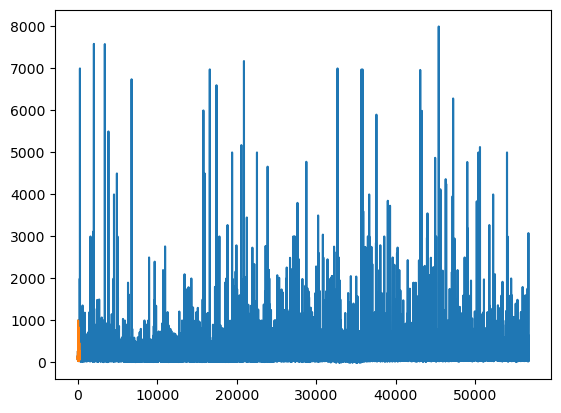

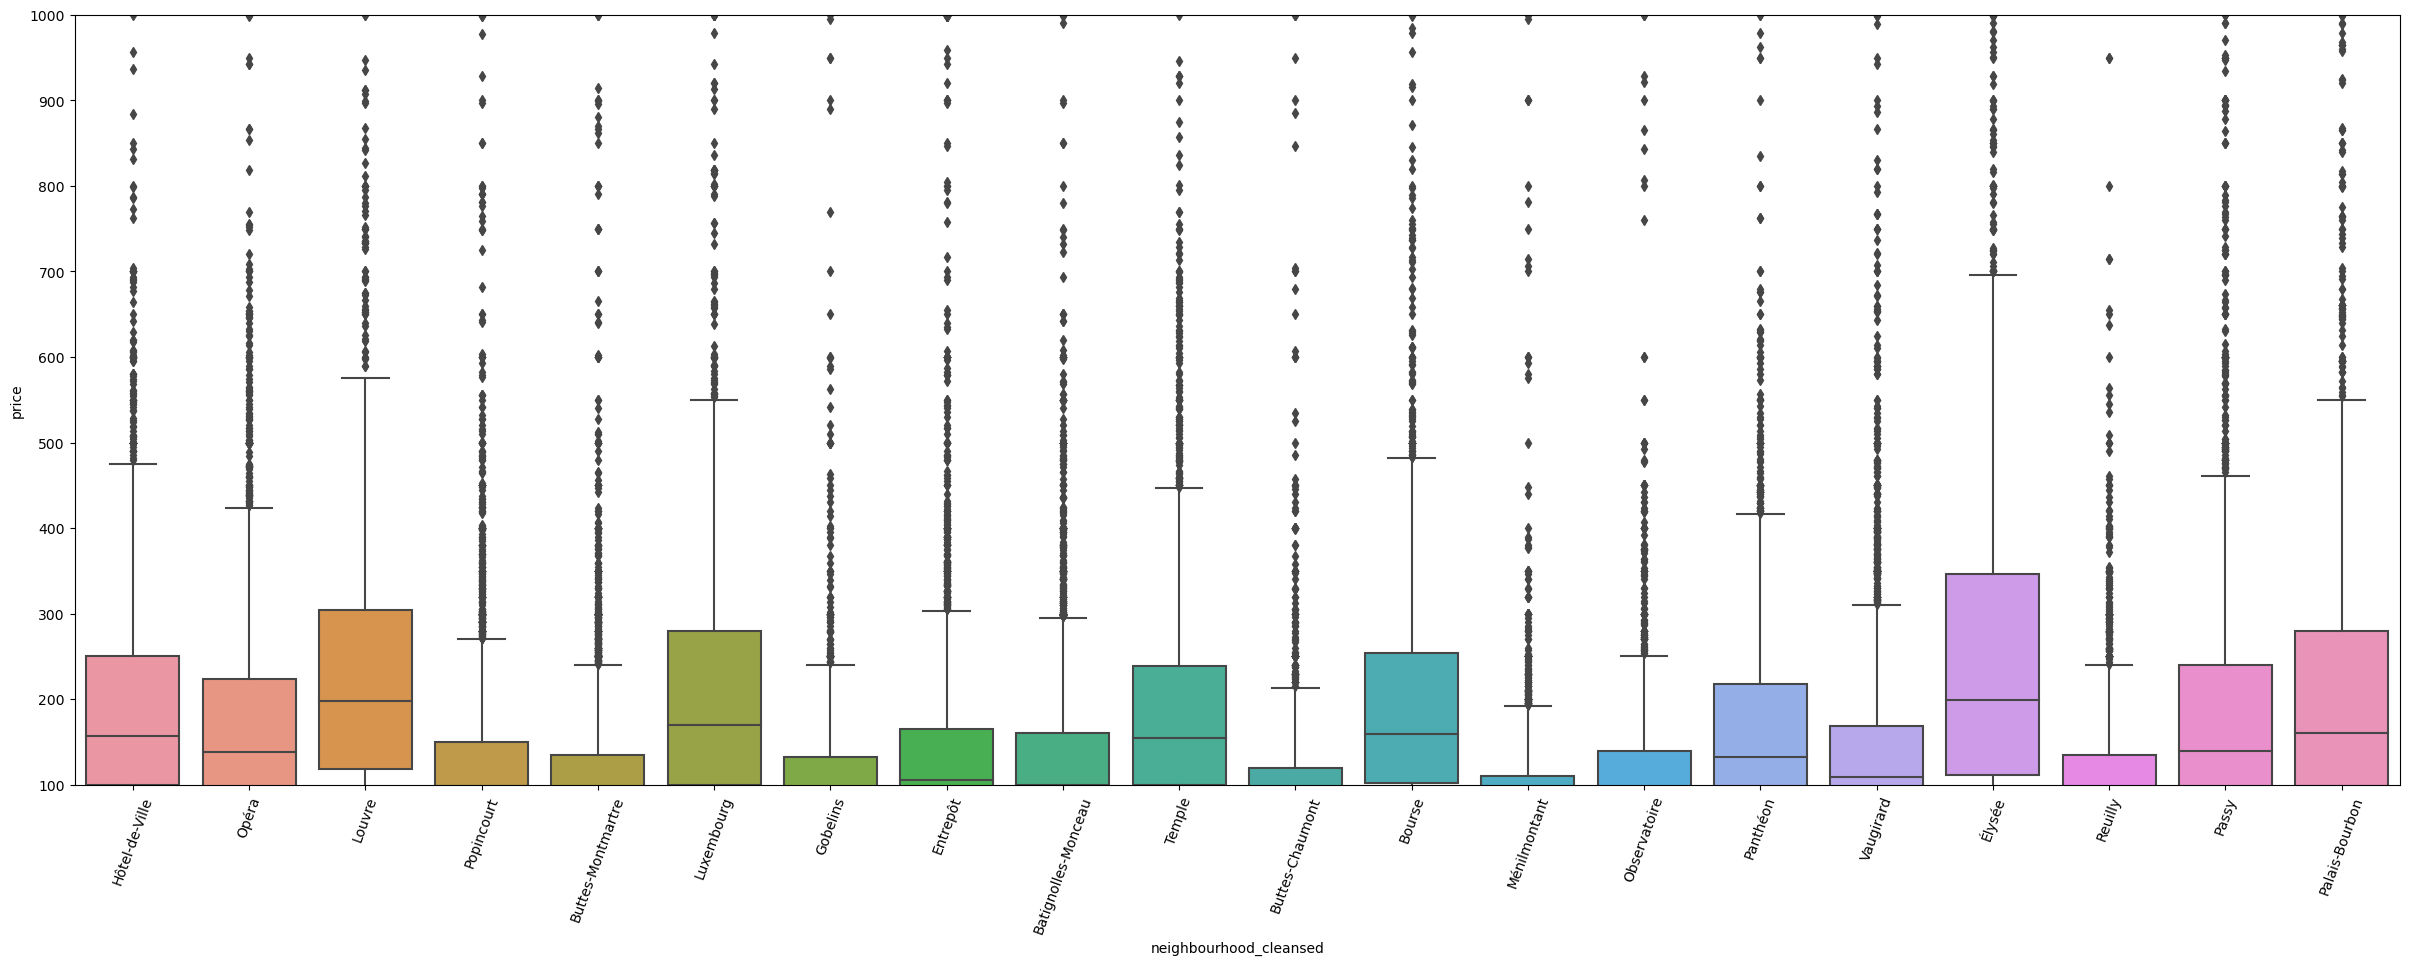

In [18]:
plt.figure(figsize=(30,10))
ax = sns.boxplot(data=paris_l_clean, x='neighbourhood_cleansed',y='price')
plt.xticks(rotation=70)
plt.ylim(100, 1000)
plt.show()

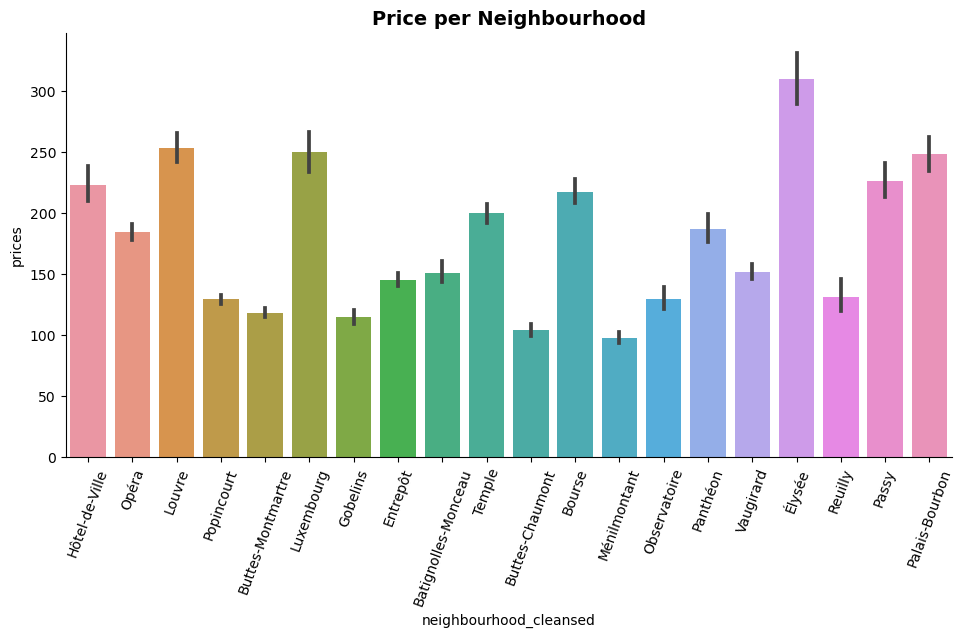

In [19]:
sns.catplot(data=paris_l_clean, x='neighbourhood_cleansed', y='price', 
            kind='bar',
            height=5, aspect=2)
plt.xticks(rotation=70)
plt.ylabel('prices')
plt.title('Price per Neighbourhood', fontweight='bold', fontsize=14)
plt.show()

Index(['id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'price',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms_text',
       'amenities'],
      dtype='object')

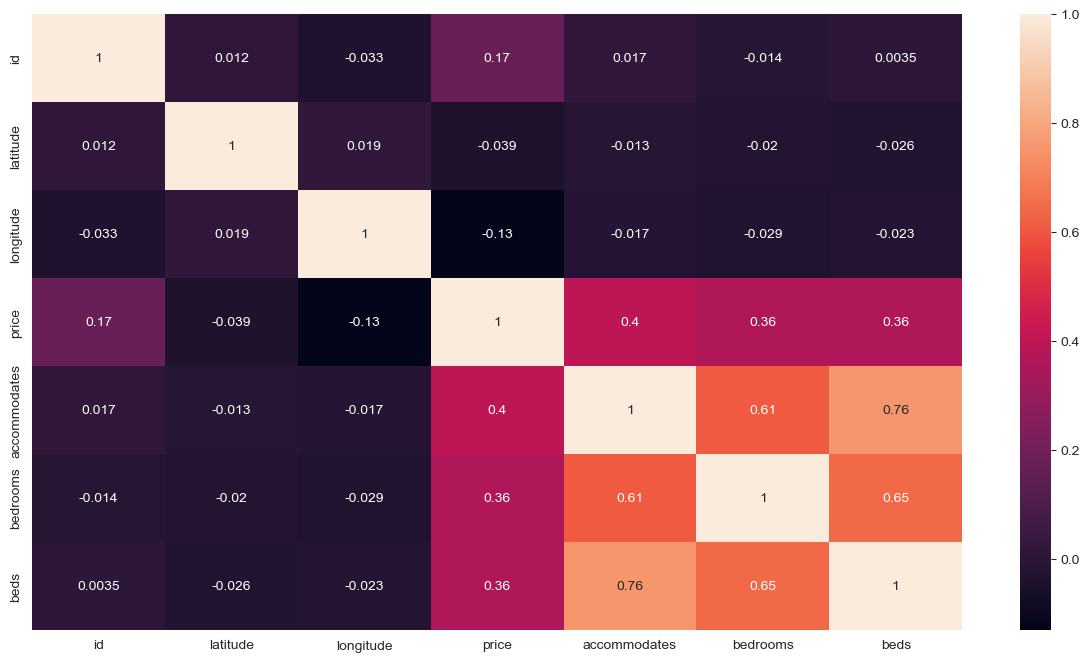

In [32]:
corr = paris_l_clean.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
paris_l_clean.columns

In [39]:
sub_1=paris_l_clean.loc[(paris_l_clean['neighbourhood_cleansed'] == 'Élysée') & (paris_l_clean['room_type']=='Shared room')]
price_sub1=paris_l_clean['price'].iloc[sub_1.index]

sub_2=paris_l_clean.loc[(paris_l_clean['neighbourhood_cleansed'] == 'Palais-Bourbon') & (paris_l_clean['room_type']=='Shared room')]
price_sub2=paris_l_clean['price'].iloc[sub_2.index]

sub_3=paris_l_clean.loc[(paris_l_clean['neighbourhood_cleansed'] == 'Louvre') & (paris_l_clean['room_type']=='Shared room')]
price_sub3=paris_l_clean['price'].iloc[sub_3.index]

sub_4=paris_l_clean.loc[(paris_l_clean['neighbourhood_cleansed'] == 'Vaugirard') & (paris_l_clean['room_type']=='Shared room')]
price_sub4=paris_l_clean['price'].iloc[sub_4.index]

sub_5=paris_l_clean.loc[(paris_l_clean['neighbourhood_cleansed'] == 'Bourse') & (paris_l_clean['room_type']=='Shared room')]
price_sub5=paris_l_clean['price'].iloc[sub_5.index]

percentile_price_élysée=[]
percentile_price_palais_bourbon=[]
percentile_price_louvre=[]
percentile_price_vaugirard=[]
percentile_price_bourse=[]

percentiles=[]
for i in range(25,91):
    percentile_price_élysée.append(int(price_sub1.quantile(i/100)))
    percentile_price_palais_bourbon.append(int(price_sub2.quantile(i/100)))
    percentile_price_louvre.append(int(price_sub3.quantile(i/100)))
    percentile_price_vaugirard.append(int(price_sub4.quantile(i/100)))
    percentile_price_bourse.append(int(price_sub5.quantile(i/100)))
    percentiles.append(i)

[Text(0.5, 0, 'Percentiles'), Text(0, 0.5, 'Percentile Prices')]

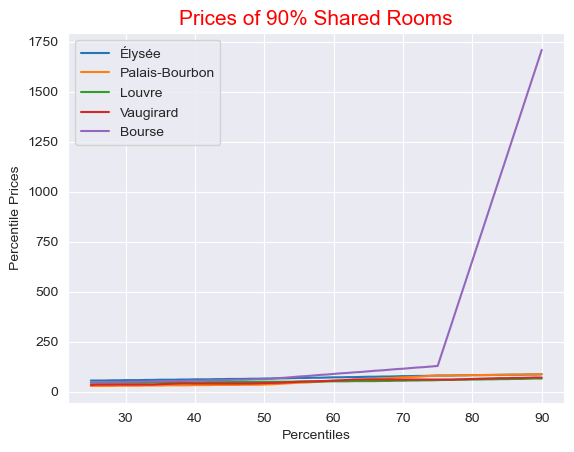

In [40]:
plt.title('Prices of 90% Shared Rooms',fontsize=15,color='Red')
sns.set_style("darkgrid")
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_élysée),label='Élysée')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_palais_bourbon),label='Palais-Bourbon')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_louvre),label='Louvre')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_vaugirard),label='Vaugirard')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_bourse),label='Bourse')
sd.set(xlabel='Percentiles', ylabel='Percentile Prices')

In [41]:
# Evaluation 6 - prices in every neighbourhood cleansed

# Élysée
nei1 = paris_l_clean.loc[paris_l_clean['neighbourhood_cleansed'] == 'Élysée']
price_nei1 = nei1[['price']]
# Palais-Bourbon
nei2 = paris_l_clean.loc[paris_l_clean['neighbourhood_cleansed'] == 'Palais-Bourbon']
price_nei2 = nei2[['price']]
# Louvre
nei3 = paris_l_clean.loc[paris_l_clean['neighbourhood_cleansed'] == 'Louvre']
price_nei3 = nei3[['price']]
# Vaugirard
nei4 = paris_l_clean.loc[paris_l_clean['neighbourhood_cleansed'] == 'Vaugirard']
price_nei4 = nei4[['price']]
# Bourse
nei5 = paris_l_clean.loc[paris_l_clean['neighbourhood_cleansed'] == 'Bourse']
price_nei5 = nei5[['price']]

price_list = [price_nei1, price_nei2, price_nei3, price_nei4, price_nei5]



price_stats = []
nei_list = ['Élysée', 'Palais-Bourbon', 'Louvre', 'Vaugirard', 'Bourse']

# price statistics for every neighbourhood

for x in price_list:
    i = x.describe(percentiles=[.25, .5, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    price_stats.append(i)

price_stats[0].rename(columns={'price': nei_list[0]}, inplace=True)
price_stats[1].rename(columns={'price': nei_list[1]}, inplace=True)
price_stats[2].rename(columns={'price': nei_list[2]}, inplace=True)
price_stats[3].rename(columns={'price': nei_list[3]}, inplace=True)
price_stats[4].rename(columns={'price': nei_list[4]}, inplace=True)

# final view of dataframe

stats_df = price_stats
stats_df = [df.set_index('Stats') for df in stats_df]
stats_df=stats_df[0].join(stats_df[1:])
stats_df

,Élysée,Palais-Bourbon,Louvre,Vaugirard,Bourse
Stats,,,,,
min,0.0,0.0,0.0,0.0,15.00
25%,111.0,99.0,119.0,75.0,102.00
50%,199.0,160.0,198.0,109.0,159.00
75%,347.0,280.0,304.0,169.0,254.75
max,9280.0,9280.0,2500.0,93000.0,9336.00


Text(0, 0.5, 'Price')

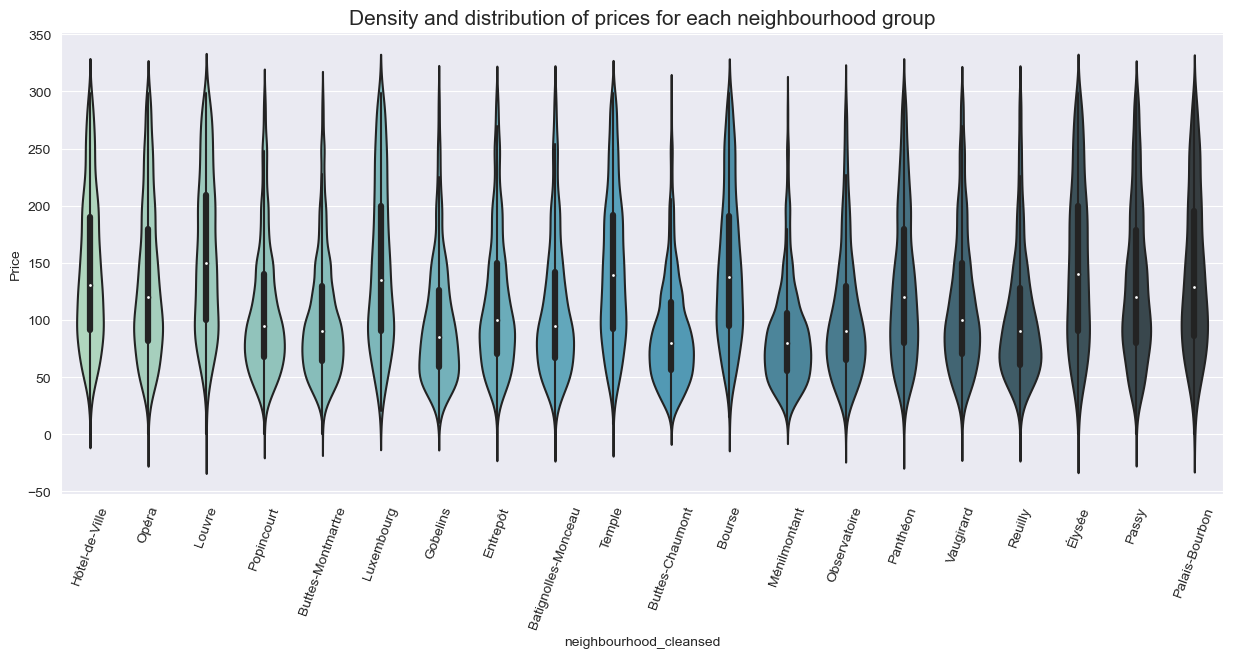

In [42]:
plt.figure(figsize=(15,6))
sns.violinplot(data=paris_l_clean[paris_l_clean.price <300], x='neighbourhood_cleansed', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('neighbourhood_cleansed')
plt.xticks(rotation=70)
plt.ylabel("Price")